## 01 - Exploratory Data Analysis
German Credit Risk Dataset

Veri setinin genel yapısını, dağılımlarını ve değişkenler arası ilişkileri anlamak için keşifsel veri analizi.

### Setup & Data Loading

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Config
sns.set_theme(style='whitegrid')
COLORS = {'good': '#4a90a4', 'bad': '#e07b54'}
PALETTE = [COLORS['good'], COLORS['bad']]

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
df = pd.read_csv('../data/german_credit_data.csv', index_col=0)

# Map Job to categorical labels
job_mapping = {0: 'unskilled_non_resident', 1: 'unskilled_resident', 2: 'skilled', 3: 'highly_skilled'}
df['Job'] = df['Job'].map(job_mapping)

df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,skilled,own,NaN,little,1169,6,radio/TV,good
1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled_resident,own,little,NaN,2096,12,education,good
3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled,free,little,little,4870,24,car,bad
5,35,male,unskilled_resident,free,NaN,NaN,9055,36,education,good
6,53,male,skilled,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,highly_skilled,rent,little,moderate,6948,36,car,good
8,61,male,unskilled_resident,own,rich,NaN,3059,12,radio/TV,good
9,28,male,highly_skilled,own,little,moderate,5234,30,car,bad


In [7]:
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nColumns: {df.columns.tolist()}")

Shape: 1000 rows, 10 columns

Columns: ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk']


In [8]:
df.dtypes

Age                  int64
Sex                 object
Job                 object
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

### Data Dictionary

| Değişken | Tip | Açıklama |
|----------|-----|----------|
| **Age** | Sayısal | Müşterinin yaşı |
| **Sex** | Kategorik | Cinsiyet (male, female) |
| **Job** | Kategorik | İstihdam beceri seviyesi (unskilled_non_resident, unskilled_resident, skilled, highly_skilled) |
| **Housing** | Kategorik | Konut durumu (own, rent, free) |
| **Saving accounts** | Kategorik | Birikim hesabı bakiye seviyesi (little, moderate, quite rich, rich) |
| **Checking account** | Kategorik | Vadesiz hesap bakiye seviyesi (little, moderate, rich) |
| **Credit amount** | Sayısal | Kredi tutarı (DM, Alman Markı) |
| **Duration** | Sayısal | Kredi süresi (ay) |
| **Purpose** | Kategorik | Kredi amacı (car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others) |
| **Risk** | Hedef | Kredi risk sınıflandırması (good, bad) |

### Target Analysis

Hedef değişkenin dağılımı. Sınıf dengesizliği modelleme stratejisini doğrudan etkiler.

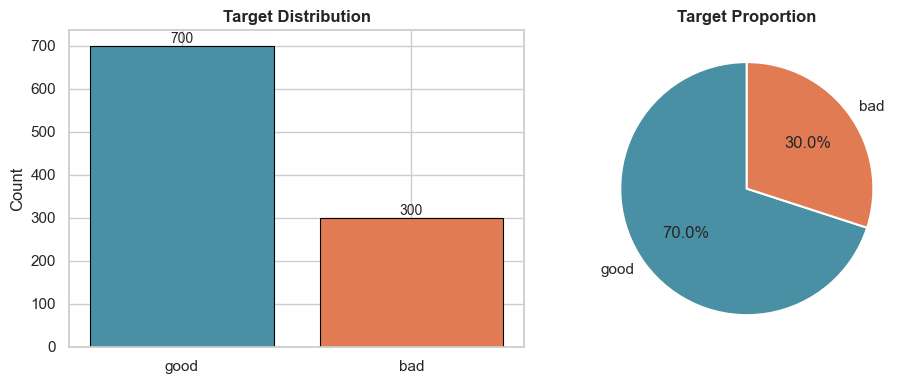

In [9]:
target_counts = df['Risk'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar chart
bars = axes[0].bar(target_counts.index, target_counts.values, 
                   color=[COLORS[x] for x in target_counts.index], edgecolor='black', linewidth=0.8)
axes[0].set_title('Target Distribution', fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].bar_label(bars, fmt='%d', fontsize=10)

# Pie chart
axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
            colors=[COLORS[x] for x in target_counts.index], startangle=90,
            wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
axes[1].set_title('Target Proportion', fontweight='bold')

plt.tight_layout()
plt.show()

### Data Quality Check

Eksik değerler ve tekrarlayan satırların kontrolü.

In [10]:
# Missing values
missing = pd.DataFrame({
    'Missing': df.isnull().sum(),
    'Percent': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing', ascending=False)

missing[missing['Missing'] > 0]

,Missing,Percent
Checking account,394,39.40
Saving accounts,183,18.30


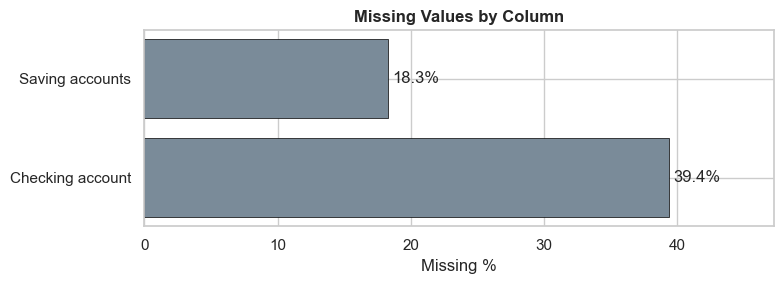

In [11]:
# Visualize missing values
missing_cols = missing[missing['Missing'] > 0]

fig, ax = plt.subplots(figsize=(8, 3))
bars = ax.barh(missing_cols.index, missing_cols['Percent'], color='#7a8b99', edgecolor='black', linewidth=0.5)
ax.set_xlabel('Missing %')
ax.set_title('Missing Values by Column', fontweight='bold')
ax.bar_label(bars, fmt='%.1f%%', padding=3)
ax.set_xlim(0, max(missing_cols['Percent']) * 1.2)
plt.tight_layout()
plt.show()

In [12]:
# Duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


### Univariate Analysis - Numerical

Sayısal değişkenlerin dağılımı, merkezi eğilim ve aykırı değer analizi.

In [13]:
num_cols = ['Age', 'Credit amount', 'Duration']
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.00,35.55,11.38,19.00,27.00,33.00,42.00,75.00
Credit amount,1000.00,3271.26,2822.74,250.00,1365.50,2319.50,3972.25,18424.00
Duration,1000.00,20.90,12.06,4.00,12.00,18.00,24.00,72.00


In [14]:
# Skewness and Kurtosis
skew_kurt = pd.DataFrame({
    'Skewness': df[num_cols].skew(),
    'Kurtosis': df[num_cols].kurtosis()
}).round(2)
skew_kurt

,Skewness,Kurtosis
Age,1.02,0.60
Credit amount,1.95,4.29
Duration,1.09,0.92


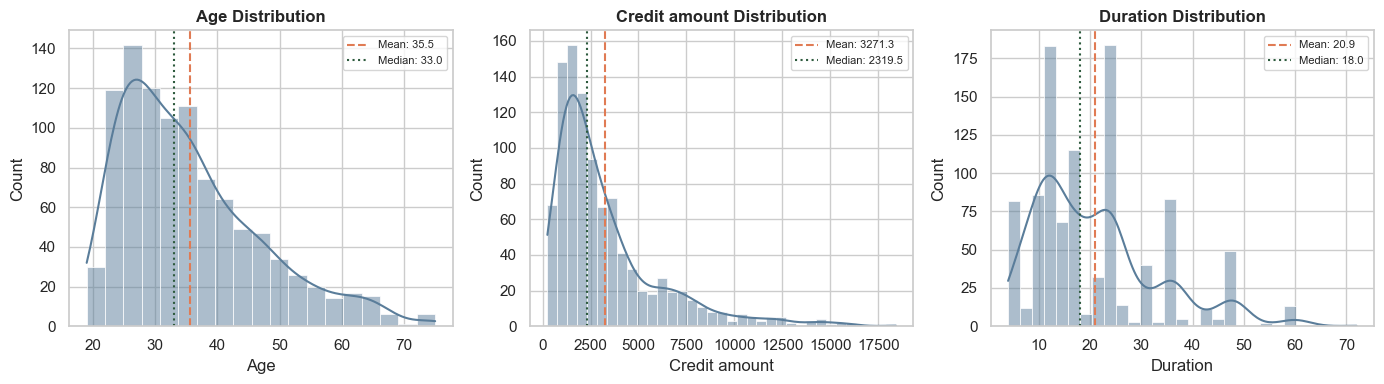

In [15]:
# Distribution plots
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], kde=True, ax=ax, color='#5a7d9a', edgecolor='white', linewidth=0.5)
    ax.axvline(df[col].mean(), color='#e07b54', linestyle='--', linewidth=1.5, label=f'Mean: {df[col].mean():.1f}')
    ax.axvline(df[col].median(), color='#2d5a3d', linestyle=':', linewidth=1.5, label=f'Median: {df[col].median():.1f}')
    ax.set_title(f'{col} Distribution', fontweight='bold')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

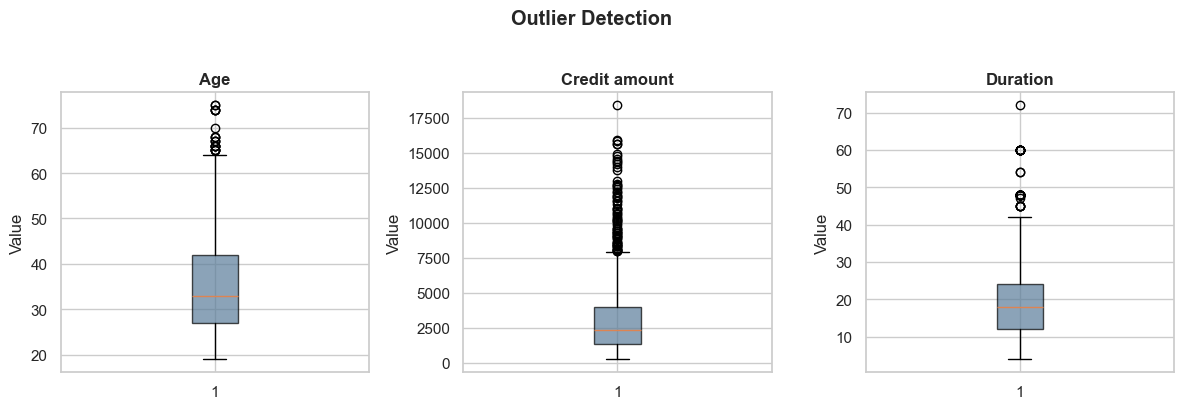

In [16]:
# Boxplots for outlier detection
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, col in zip(axes, num_cols):
    bp = ax.boxplot(df[col].dropna(), patch_artist=True)
    bp['boxes'][0].set_facecolor('#5a7d9a')
    bp['boxes'][0].set_alpha(0.7)
    ax.set_title(col, fontweight='bold')
    ax.set_ylabel('Value')

plt.suptitle('Outlier Detection', fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [17]:
# Outlier counts using IQR
def count_outliers(series):
    Q1, Q3 = series.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

outliers = {col: count_outliers(df[col]) for col in num_cols}
print("Outlier counts (IQR method):")
for col, count in outliers.items():
    print(f"  {col}: {count} ({count/len(df)*100:.1f}%)")

Outlier counts (IQR method):
  Age: 23 (2.3%)
  Credit amount: 72 (7.2%)
  Duration: 70 (7.0%)


### Univariate Analysis - Categorical

Kategorik değişkenlerin frekans dağılımları.

In [18]:
cat_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [19]:
# Value counts summary
for col in cat_cols:
    print(f"\n{col} (unique: {df[col].nunique()})")
    print(df[col].value_counts().to_string())


Sex (unique: 2)
Sex
male      690
female    310

Job (unique: 4)
Job
skilled                   630
unskilled_resident        200
highly_skilled            148
unskilled_non_resident     22

Housing (unique: 3)
Housing
own     713
rent    179
free    108

Saving accounts (unique: 4)
Saving accounts
little        603
moderate      103
quite rich     63
rich           48

Checking account (unique: 3)
Checking account
little      274
moderate    269
rich         63

Purpose (unique: 8)
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12


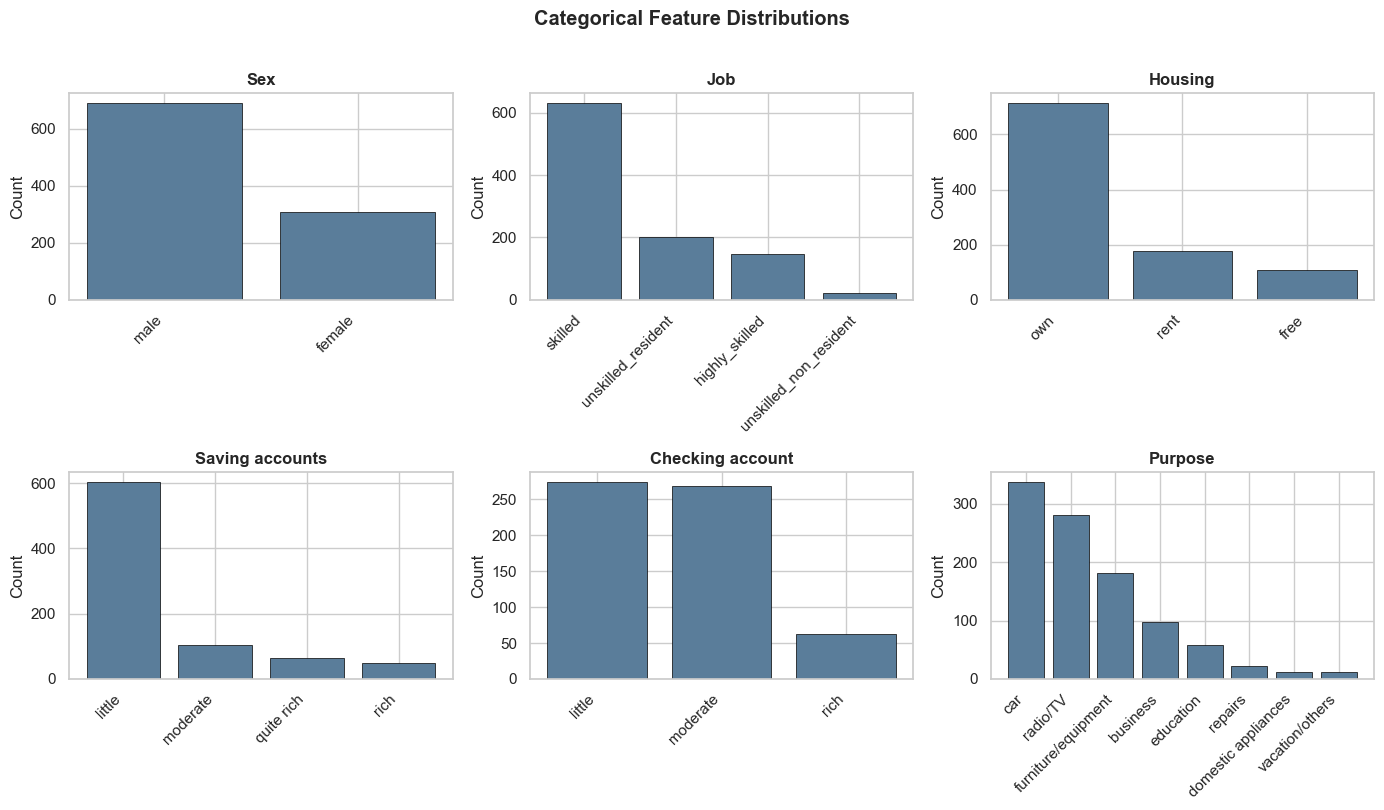

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flat

for idx, col in enumerate(cat_cols):
    counts = df[col].value_counts()
    bars = axes[idx].bar(range(len(counts)), counts.values, color='#5a7d9a', edgecolor='black', linewidth=0.5)
    axes[idx].set_xticks(range(len(counts)))
    axes[idx].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[idx].set_title(col, fontweight='bold')
    axes[idx].set_ylabel('Count')

plt.suptitle('Categorical Feature Distributions', fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

### Bivariate Analysis - Numerical vs Target

Sayısal değişkenlerin hedef değişken ile ilişkisi.

In [21]:
# Grouped statistics
grouped_stats = df.groupby('Risk')[num_cols].agg(['mean', 'median', 'std']).round(2)
grouped_stats

Age              Credit amount                 Duration             
      mean median   std          mean  median     std     mean median   std
Risk                                                                       
bad  33.96  31.00 11.22       3938.13 2574.50 3535.82    24.86  24.00 13.28
good 36.22  34.00 11.38       2985.46 2244.00 2401.47    19.21  18.00 11.08

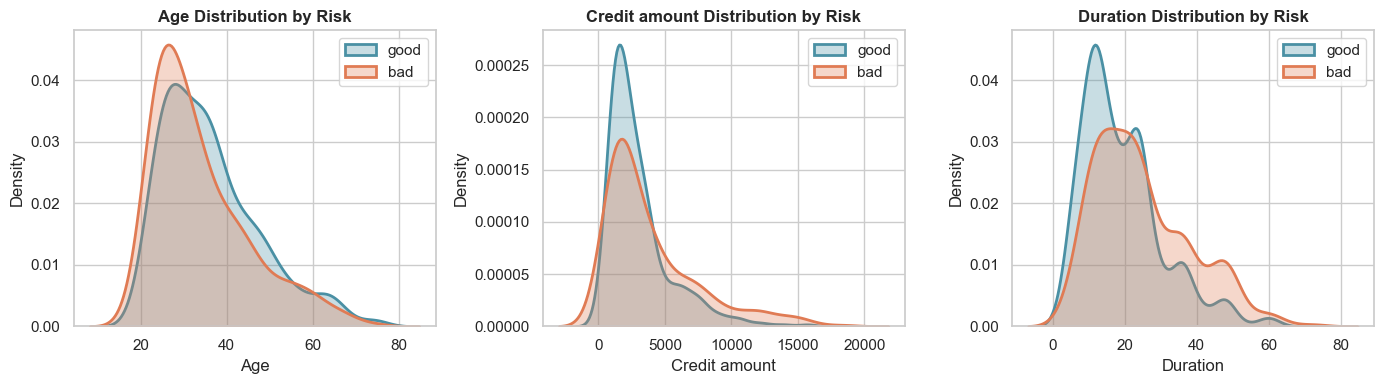

In [22]:
# KDE comparison
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for ax, col in zip(axes, num_cols):
    for risk in ['good', 'bad']:
        subset = df[df['Risk'] == risk][col]
        sns.kdeplot(subset, ax=ax, label=risk, color=COLORS[risk], linewidth=2, fill=True, alpha=0.3)
    ax.set_title(f'{col} Distribution by Risk', fontweight='bold')
    ax.legend()

plt.tight_layout()
plt.show()

### Bivariate Analysis - Categorical vs Target

Her kategorik değişkenin risk sınıflarına göre dağılımı.

In [23]:
# Risk rate by category
def calculate_risk_rate(col):
    ct = pd.crosstab(df[col], df['Risk'], normalize='index') * 100
    return ct['bad'].sort_values(ascending=False)

print("Bad Risk Rate by Category:\n")
for col in cat_cols:
    print(f"{col}:")
    print(calculate_risk_rate(col).round(1).to_string())
    print()

Bad Risk Rate by Category:

Sex:
Sex
female   35.20
male     27.70

Job:
Job
highly_skilled           34.50
unskilled_non_resident   31.80
skilled                  29.50
unskilled_resident       28.00

Housing:
Housing
free   40.70
rent   39.10
own    26.10

Saving accounts:
Saving accounts
little       36.00
moderate     33.00
quite rich   17.50
rich         12.50

Checking account:
Checking account
little     49.30
moderate   39.00
rich       22.20

Purpose:
Purpose
vacation/others       41.70
education             39.00
repairs               36.40
business              35.10
domestic appliances   33.30
furniture/equipment   32.00
car                   31.50
radio/TV              22.10



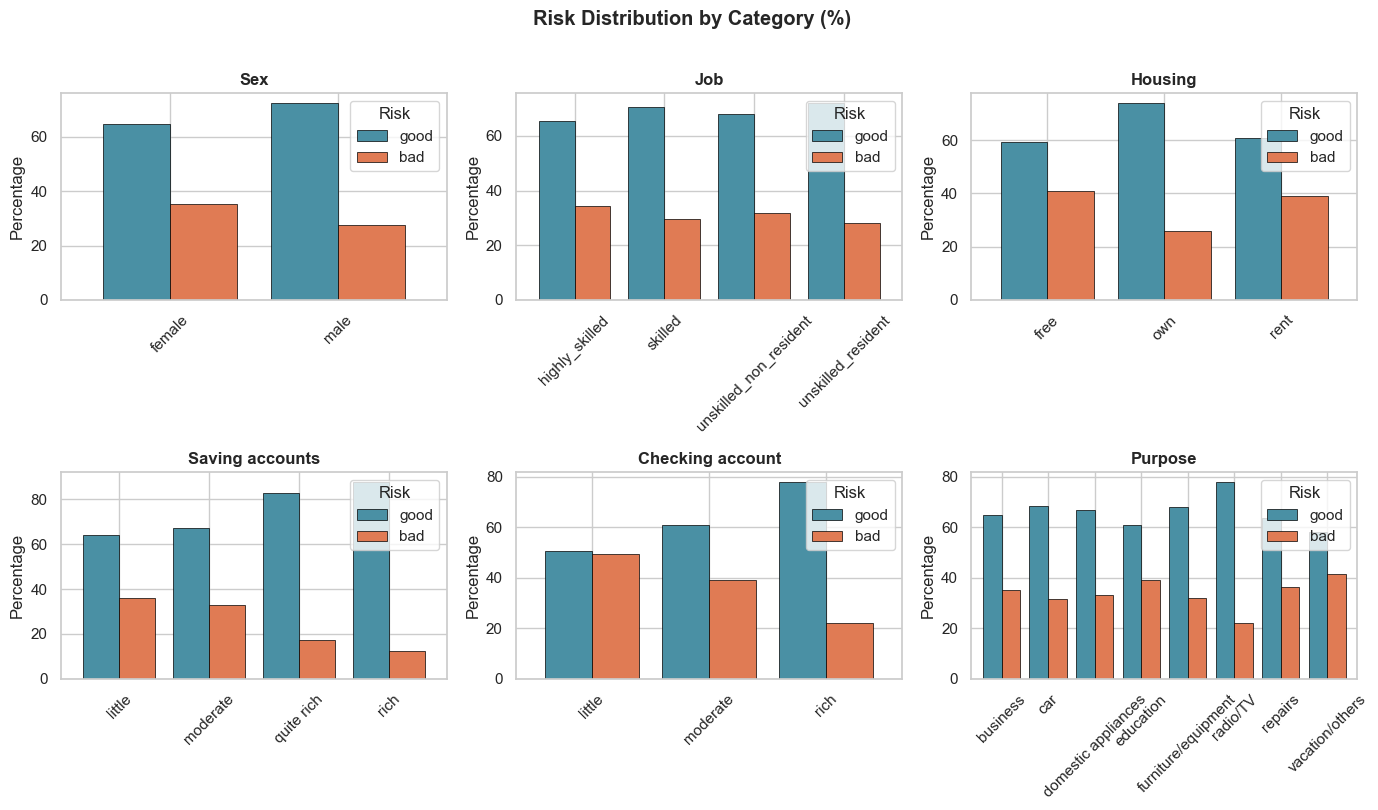

In [24]:
# Grouped bar charts (percentage)
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flat

for idx, col in enumerate(cat_cols):
    ct = pd.crosstab(df[col], df['Risk'], normalize='index') * 100
    ct = ct[['good', 'bad']]
    ct.plot(kind='bar', stacked=False, ax=axes[idx], color=PALETTE, edgecolor='black', linewidth=0.5, width=0.8)
    axes[idx].set_title(f'{col}', fontweight='bold')
    axes[idx].set_ylabel('Percentage')
    axes[idx].set_xlabel('')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(title='Risk', loc='upper right')

plt.suptitle('Risk Distribution by Category (%)', fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

### Correlation Analysis

Sayısal değişkenler arası korelasyon. Yüksek korelasyon multicollinearity riski taşır.

In [25]:
corr_matrix = df[num_cols].corr()
corr_matrix.round(3)

,Age,Credit amount,Duration
Age,1.00,0.03,-0.04
Credit amount,0.03,1.00,0.62
Duration,-0.04,0.62,1.00
